# `SiFT` kernels

We provide examples for the different `SiFT` kernels

We use the Drosophila wing disc development single cell data [[1]](https://doi.org/10.7554/eLife.61276) for the demonstration.

[[1] Everetts, N. J., Worley, M. I., Yasutomi, R., Yosef, N., & Hariharan, I. K. (2021). Single-cell transcriptomics of the Drosophila wing disc reveals instructive epithelium-to-myoblast interactions. Elife, 10, e61276.](https://doi.org/10.7554/eLife.61276)


In [1]:
import numpy as np
import scanpy as sc

import sift

## Load and set the `adata`

In [2]:
DATA_DIR = ".../drosophila.annotated.h5ad"  # set path to anndata

In [3]:
adata = sc.read(DATA_DIR)

In [4]:
nuisance_genes = np.concatenate((adata.uns["sex_genes"], adata.uns["cell_cycle_genes"]))
adata.obsm["nuisance_genes"] = adata[:, nuisance_genes].X
adata.uns["nuisance_genes"] = nuisance_genes

gene_subset = [g for g in adata.var_names if g not in nuisance_genes]
adata = adata[:, gene_subset].copy()

## Define `SiFT` kernels

### RBF kernel

The _RBF kernel_, aka squared-exponential kernel, defines distances between cells in the given space using:
$$k(x_i, x_j) = \exp\left(\frac{d(x_i, x_j)}{l}\right),$$
where $l$ is the `length_scale` parameter.

Here we consider distances based on the `nuisance_genes` by setting `kernel_key=nuisance_genes`.
We define adjust the `length_scale` by passing `kernel_params = {"length_scale":0.5}`

In [5]:
metric_ = "rbf"
kernel_key_ = "nuisance_genes"
kernel_params_ = {"length_scale": 0.5}

In [6]:
sft = sift.SiFT(
    adata=adata,
    kernel_key=kernel_key_,
    metric=metric_,
    kernel_params=kernel_params_,
    copy=True,
)

INFO     sift: initialized a SiFTer with rbf kernel.                                                               


Visualize the kernel using `plot_kernel()`.

* `groupby`: the `key` in the `anndata` we can group the cells by.
* `color_palette`: colors for the `groupby` groups.

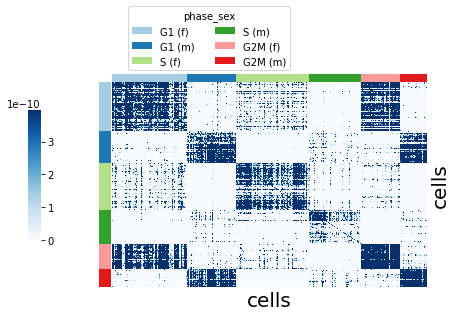

In [7]:
sft.plot_kernel(groupby="phase_sex", color_palette=adata.uns["phase_sex_colors"])


### k-NN kernel
The `k-NN` connectivity graph defines the cell-cell similarity kernel.
The connectivity graph is computed over the attributes given in `kernel_key` (a `key` in the `adata` object),
here we consider `kernel_key=nuisance_genes`.

The `n_neighbors` parameter defines the number of neighbors in the connectivity graph.

In [8]:
metric_ = "knn"
n_neighbors_ = 5
kernel_key_ = "nuisance_genes"

In [9]:
sft = sift.SiFT(
    adata=adata,
    kernel_key=kernel_key_,
    n_neighbors=n_neighbors_,
    metric=metric_,
    copy=True,
)

INFO     sift: initialized a SiFTer with knn kernel.                                                               


Visualize the kernel using `plot_kernel()`.

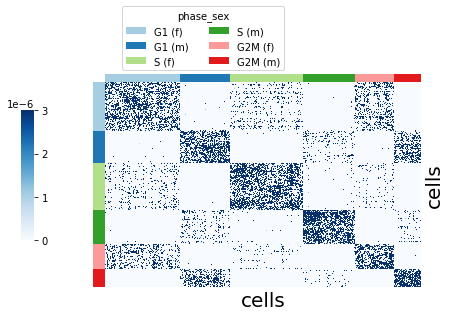

In [10]:
sft.plot_kernel(groupby="phase_sex", color_palette=adata.uns["phase_sex_colors"])

### Mapping kernel

The _mapping kernel_ takes a mapping of the cells to a given signal.
Here we use the deterministic mapping of the cells to the _cell cycle phase_ & _sex label_,
using `kernel_key ="phase_sex"`.


In [11]:
metric_ = "mapping"
kernel_key_ = "phase_sex"

In [12]:
sft = sift.SiFT(
    adata=adata,
    kernel_key=kernel_key_,
    metric=metric_,
    copy=True,
)

INFO     sift: initialized a SiFTer with mapping kernel.                                                           


Visualize the kernel using `plot_kernel()`.

[KeOps] Generating code for formula Sum_Reduction((Var(0,6,0)|Var(1,6,1))*Var(2,19885,1),0) ... OK


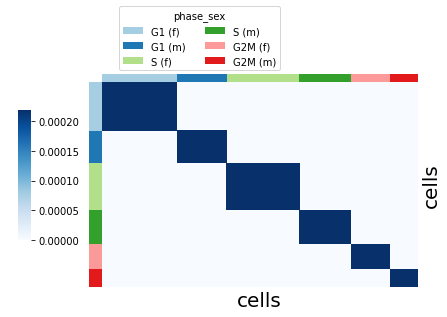

In [13]:
sft.plot_kernel(groupby="phase_sex", color_palette=adata.uns["phase_sex_colors"])